In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the two datasets

In [2]:
df1 = pd.read_csv('./Data1.csv')
df2 = pd.read_csv('./Data2.csv')

Printing the shape and column names and datatypes of both dataframes.

In [3]:
print(f'Dataset 1 Shape: {df1.shape}')
print(f'Column names: {df1.columns}')
print(f'Column datatypes: {df1.info()}')

Dataset 1 Shape: (5000, 8)
Column names: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
Column datatypes: None


In [4]:
print(f'Dataset 2 Shape: {df2.shape}')
print(f'Column names: {df2.columns}')
print(f'Column datatypes: {df2.info()}')

Dataset 2 Shape: (5000, 7)
Column names: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB
Column datatypes: None


LoanOnCard has null values, needs imputation.

Merging the dataframes on 'ID' feature.

In [5]:
df = pd.merge(df1,df2,on='ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


Changing datatype of selected columns

In [6]:
for col in df:
    if col in ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']:
        print(f'typecasting {col}')
        df[col] = df[col].astype('object')

typecasting HiddenScore
typecasting Level
typecasting Security
typecasting FixedDepositAccount
typecasting InternetBanking
typecasting CreditCard


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [8]:
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


<Axes: xlabel='LoanOnCard', ylabel='Count'>

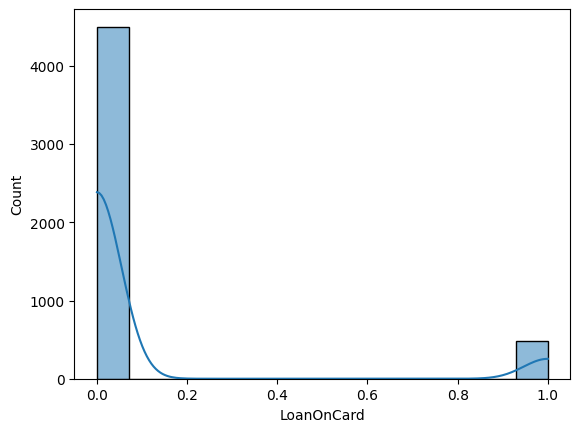

In [9]:
sns.histplot(df.LoanOnCard, kde=True)

LoanOnCard seems to follow a Poisson distribution, where most of the events are false, with a relatively small fraction being true.

d:\Study\MSC\sem1\test\Code\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


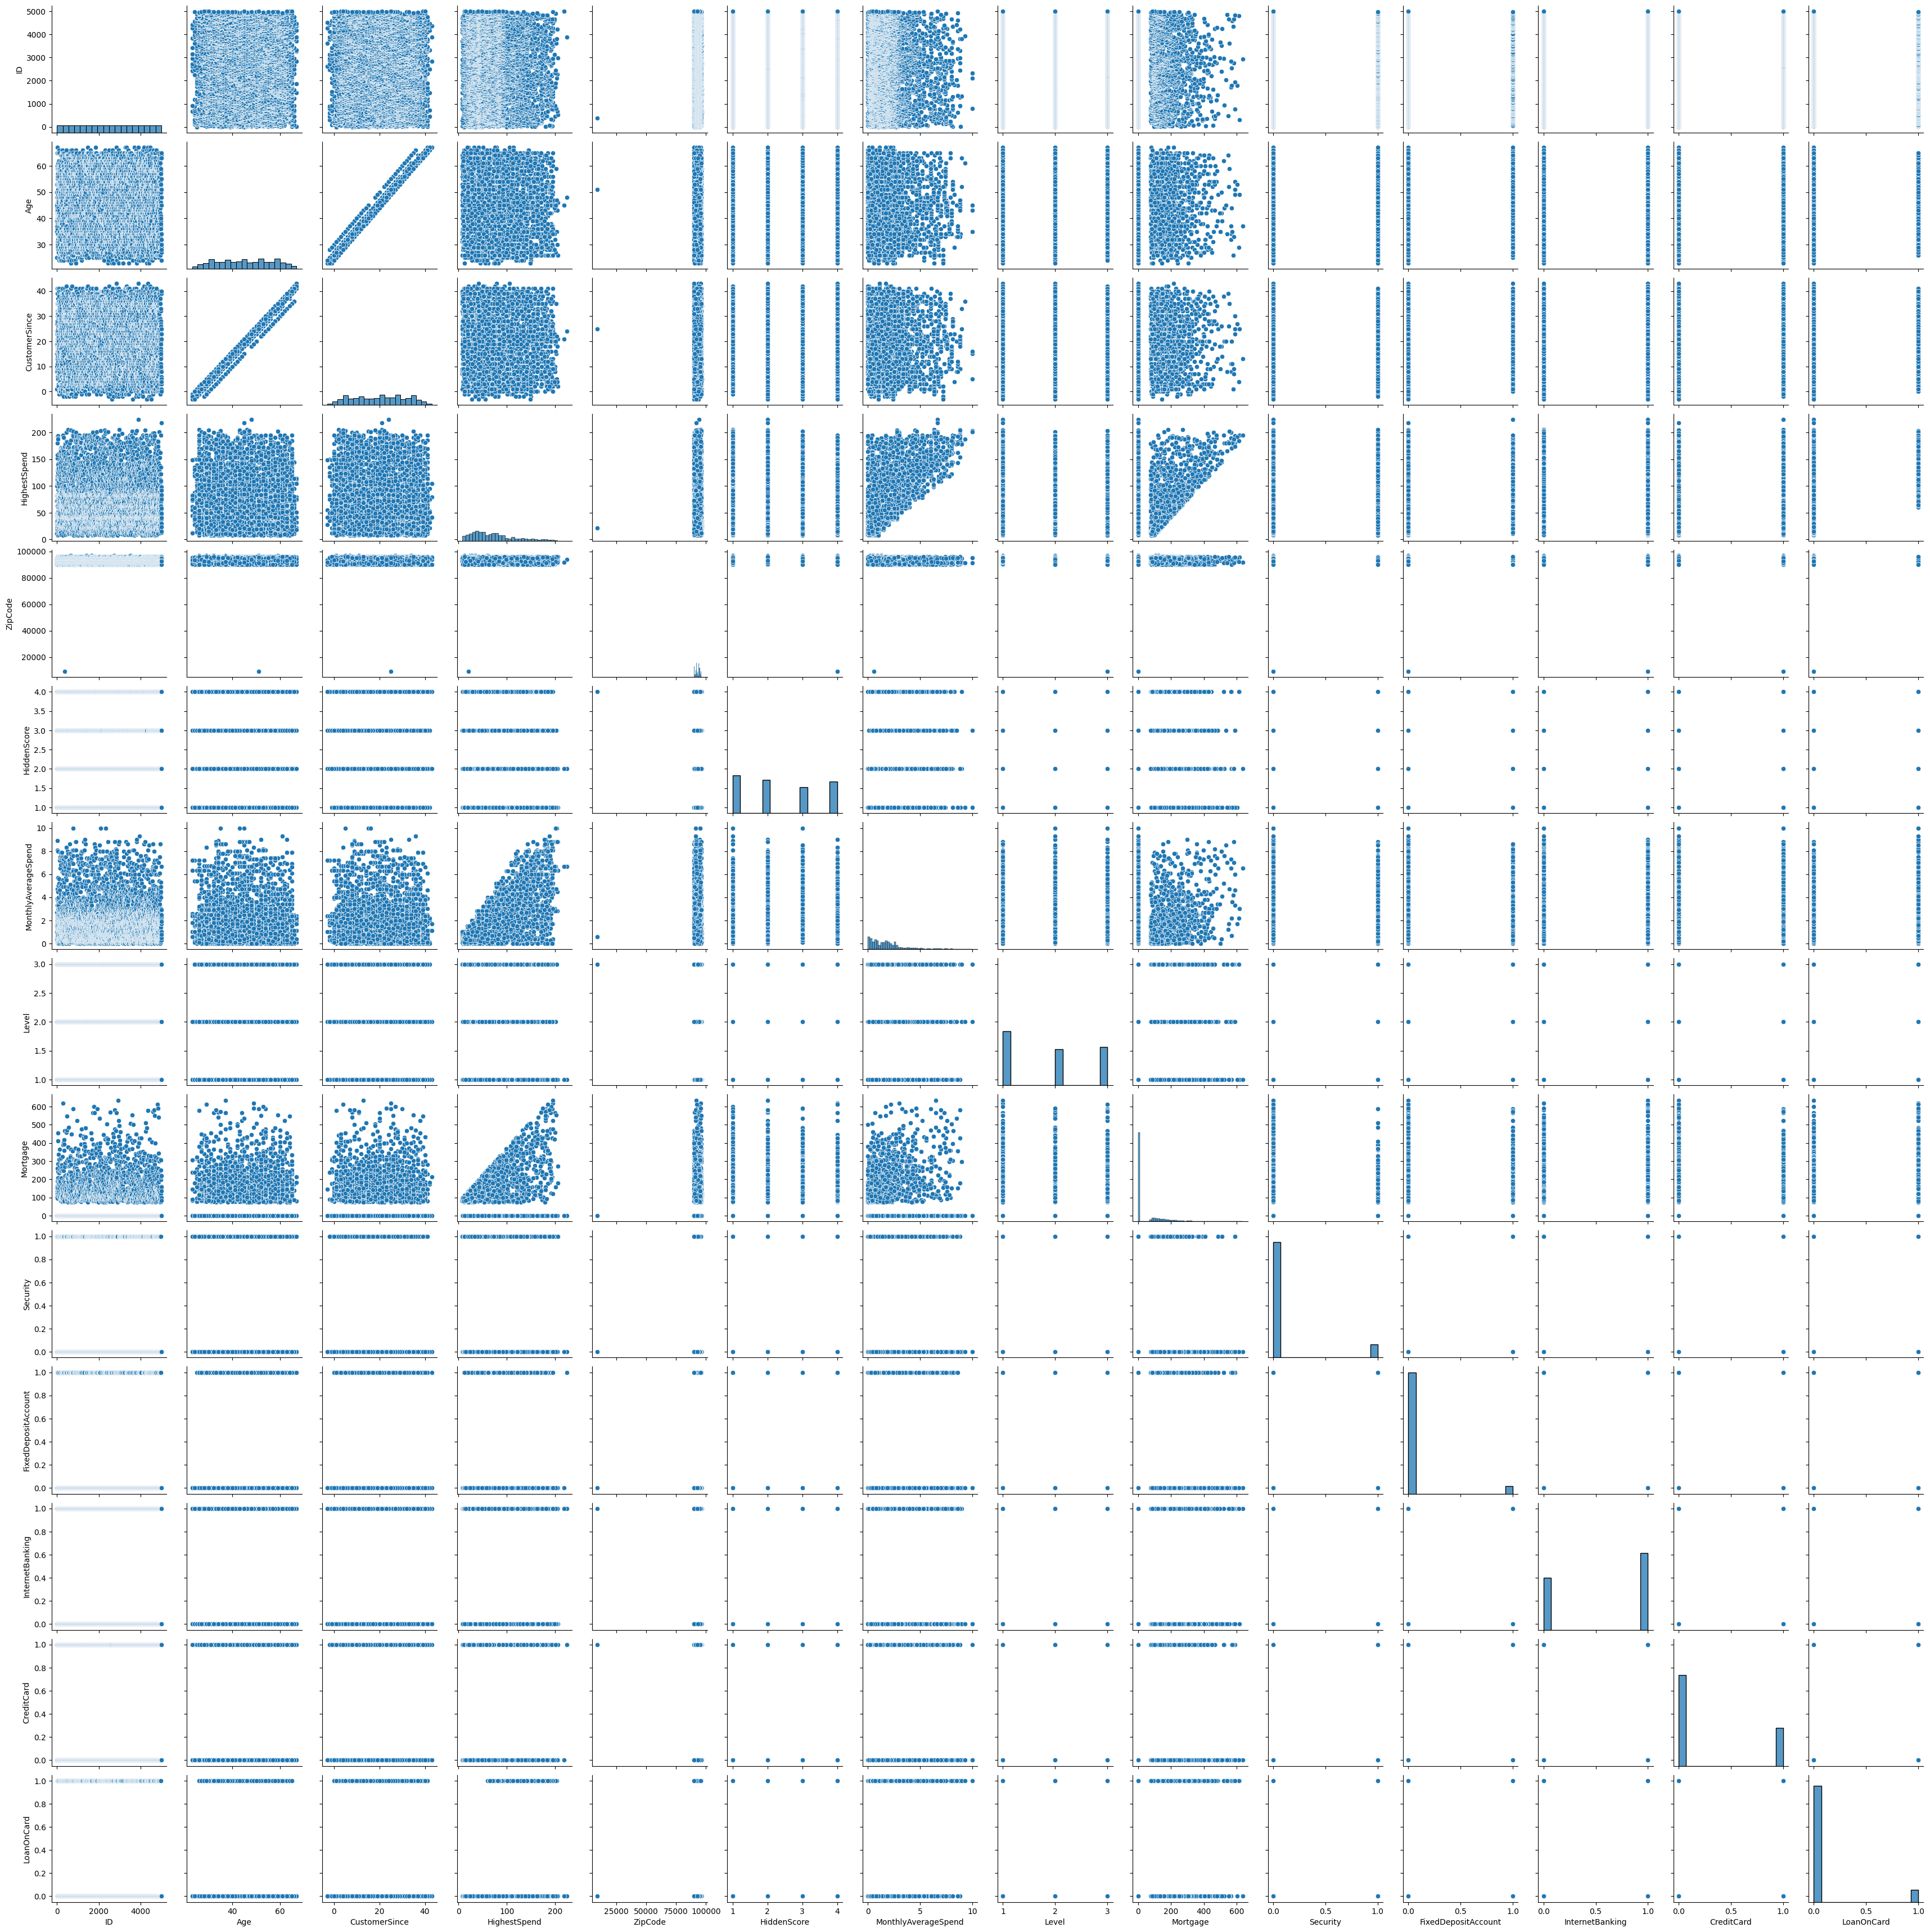

In [11]:
sns.pairplot(df)
plt.show()

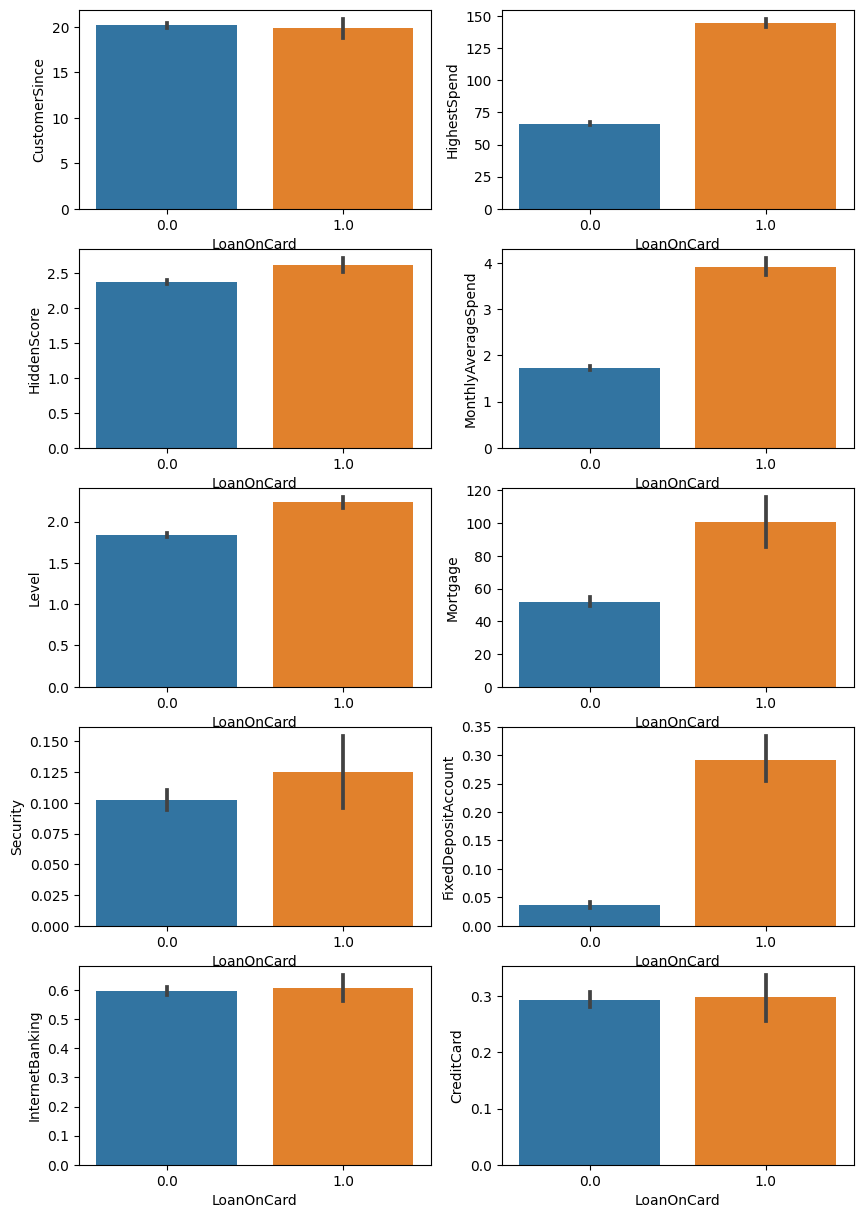

In [12]:
fig, axes = plt.subplots(5,2,figsize=(10,15))

columns = [col for col in df if col not in ['ID', 'Age', 'ZipCode', 'LoanOnCard'] ]
i = 0
for row in range(5):
    for col in range(2):
        sns.barplot(df, x='LoanOnCard', y=columns[i], ax=axes[row,col])
        i += 1   
plt.show()

<Axes: >

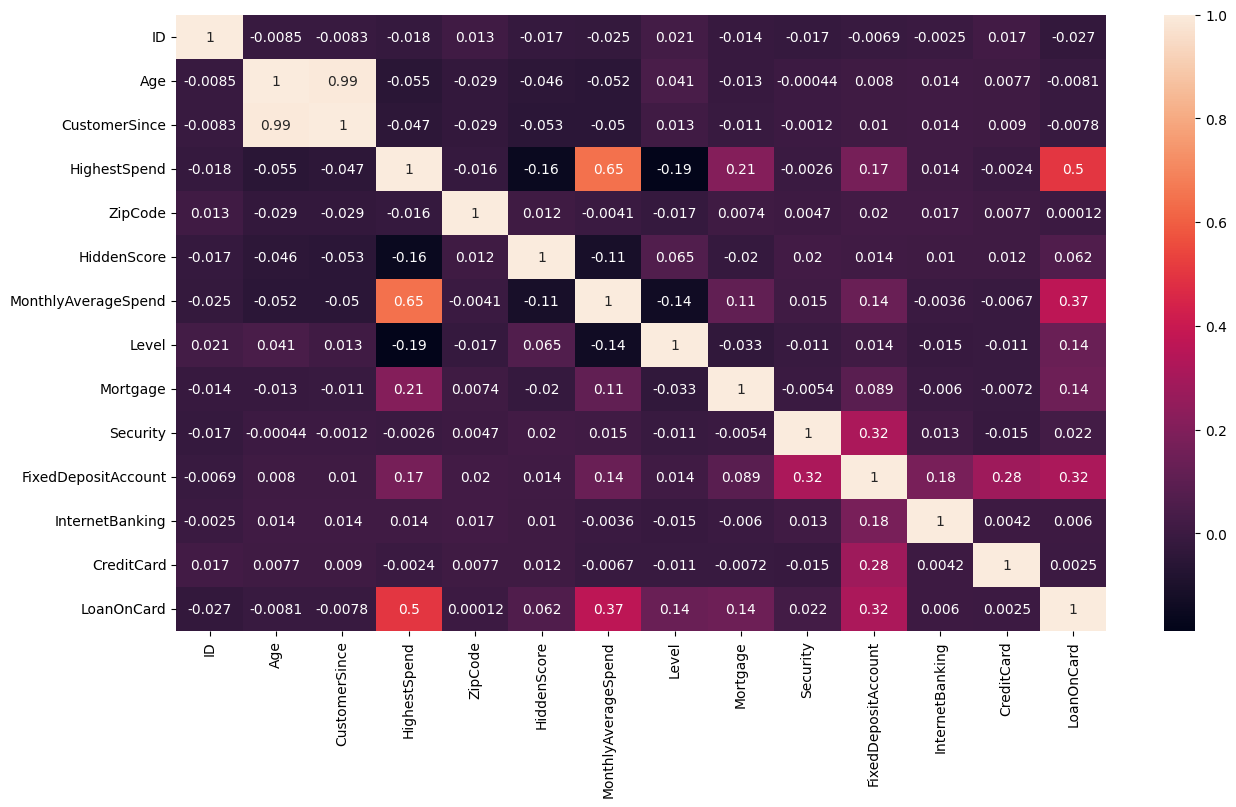

In [13]:
fig = plt.subplots(1,1,figsize=(15,8))

sns.heatmap(df.corr(), annot=True)

## Inference

LoanOnCard has a high correlation with HighestSpend, MonthlyAverageSpend, and FixedDepositAccount.

A small correlation with Level and Mortgage. These features are probably more important than the others in deciding the target value.

In [14]:
Loan_Corrs = df.corr().LoanOnCard
Loan_Corrs = [corr for corr in Loan_Corrs.items() if np.abs(corr[1]) > 0.1]
print(len(Loan_Corrs))

6


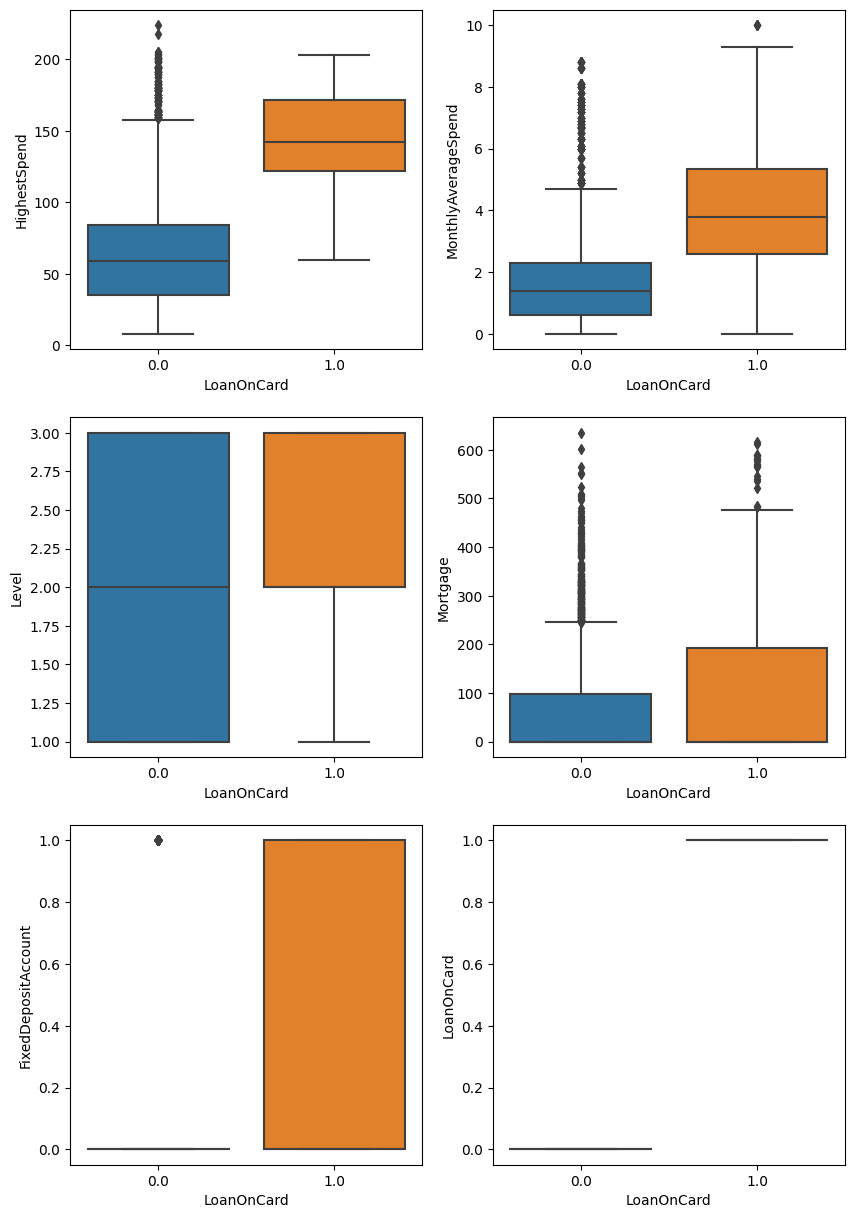

In [15]:
fig, axes = plt.subplots(3,2,figsize=(10,15))
i = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(df, x='LoanOnCard', y=Loan_Corrs[i][0], ax=axes[row,col])
        i += 1   
plt.show()

In [16]:
null_count = df.isna().sum()
null_count

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

LoanOnCard has 20 null values.

We can impute using the most common class.

Note: Instead, we can use the non-null records and build a model to predict the null values.

In [17]:
df.LoanOnCard.value_counts()

LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64

0 is the more common class.

In [18]:
df.LoanOnCard.fillna(0, inplace=True)

In [19]:
df.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

Imputation successful.

In [20]:
for col in df:
    if col not in ['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'MonthlyAverageSpend', 'Mortgage']:
        print(df[col].value_counts())

HiddenScore
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
Level
1    2096
3    1501
2    1403
Name: count, dtype: int64
Security
0    4478
1     522
Name: count, dtype: int64
FixedDepositAccount
0    4698
1     302
Name: count, dtype: int64
InternetBanking
1    2984
0    2016
Name: count, dtype: int64
CreditCard
0    3530
1    1470
Name: count, dtype: int64
LoanOnCard
0.0    4520
1.0     480
Name: count, dtype: int64


### On Analysis, we don't see any unexpected values.
